In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score, Aesthetics
#%matplotlib qt

In [2]:
model_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\models-mean-target\rOT_model_1000-5.fixed.p"
index_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\moseq2-index.role.yaml"

max_syllable = 69

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
    'CAR bsl + saline',
    'CAR bsl + mel',
    'CAR 4h',
    'CAR 24h + saline',
    'CAR 24h + mel',
    # 'CAR 6d',
    # 'CAR 14d',

#    'CAR ctrl bsl',
#    'CAR ctrl 4h',
#    'CAR ctrl 24h',
#    'CAR ctrl 6d',
#    'CAR ctrl 14d',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
aes = Aesthetics(groups)

pruned 2482 transitions which are never used


[33 13 29 51 38 41 35 15 53 16 12  9 18 37 46 55 50  2 49 28 30  1 52 58
 19 42 10 44 40 56 17  5 39 43 23 48 47 32 54 14 22 59] [31 57 21  4  3 27 34  6 25 24 11 36 45 26  7 20  0  8]
['CAR 4h' 'CAR 4h' 'CAR 24h + saline' 'CAR 24h + mel' 'CAR 4h' 'CAR 4h'
 'CAR bsl + mel' 'CAR 24h + mel' 'CAR bsl + mel' 'CAR 24h + mel'
 'CAR 24h + saline' 'CAR 24h + saline' 'CAR 4h' 'CAR 4h' 'CAR 4h'
 'CAR bsl + saline' 'CAR 24h + mel' 'CAR bsl + mel' 'CAR 4h' 'CAR 4h'
 'CAR bsl + saline' 'CAR bsl + mel' 'CAR 24h + saline' 'CAR 4h'
 'CAR bsl + mel' 'CAR 24h + mel' 'CAR bsl + saline' 'CAR bsl + mel'
 'CAR bsl + saline' 'CAR 24h + saline' 'CAR 24h + mel' 'CAR bsl + saline'
 'CAR 24h + saline' 'CAR 24h + mel' 'CAR bsl + saline' 'CAR 4h' 'CAR 4h'
 'CAR 24h + saline' 'CAR bsl + saline' 'CAR 4h' 'CAR 4h' 'CAR bsl + mel'] ['CAR bsl + mel' 'CAR 24h + saline' 'CAR 24h + saline' 'CAR 24h + mel'
 'CAR bsl + saline' 'CAR 24h + mel' 'CAR bsl + mel' 'CAR 24h + saline'
 'CAR bsl + saline' 'CAR bsl + saline' 'CAR bsl

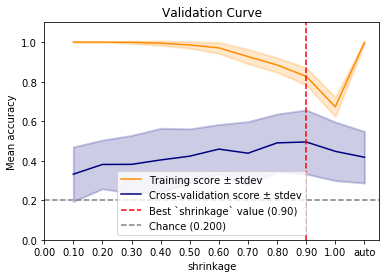

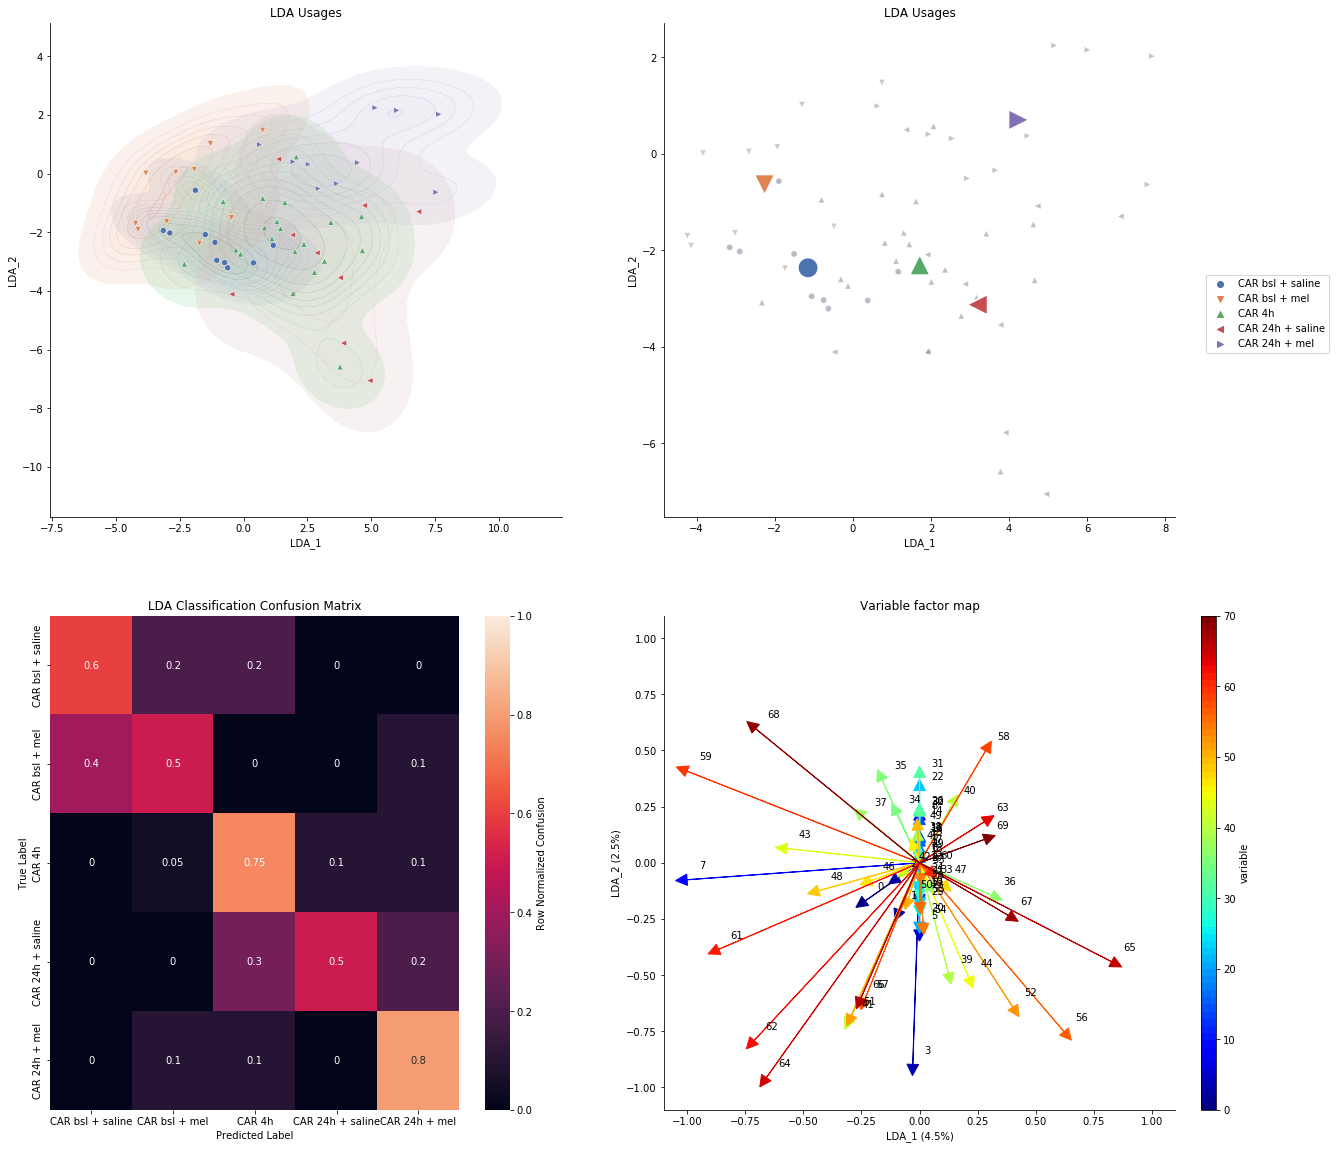

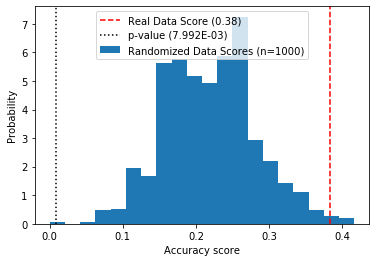

: 

In [8]:
results = train_lda_pipeline(representations, 'usages', lda_kwargs={'n_components': 2})
plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.final, representations, aes=aes, title='LDA Usages')
plot_permutation_score(results.final.estimator, results.data.usages, results.data.groups)

LDA Score: 0.8787878787878788
LDA Explained Variance: [0.12257397 0.04892409]
                  precision    recall  f1-score   support

         CAR 14d       0.85      0.79      0.81        14
   CAR 24h + mel       1.00      1.00      1.00         6
CAR 24h + saline       0.83      0.83      0.83         6
          CAR 4h       0.86      0.92      0.89        13
          CAR 6d       0.79      0.79      0.79        14
   CAR bsl + mel       1.00      1.00      1.00         7
CAR bsl + saline       1.00      1.00      1.00         6

        accuracy                           0.88        66
       macro avg       0.90      0.90      0.90        66
    weighted avg       0.88      0.88      0.88        66

LDA Score: 0.2647058823529412
LDA Explained Variance: [0.12257397 0.04892409]
                  precision    recall  f1-score   support

         CAR 14d       0.20      0.17      0.18         6
   CAR 24h + mel       0.40      0.50      0.44         4
CAR 24h + saline       0.14 

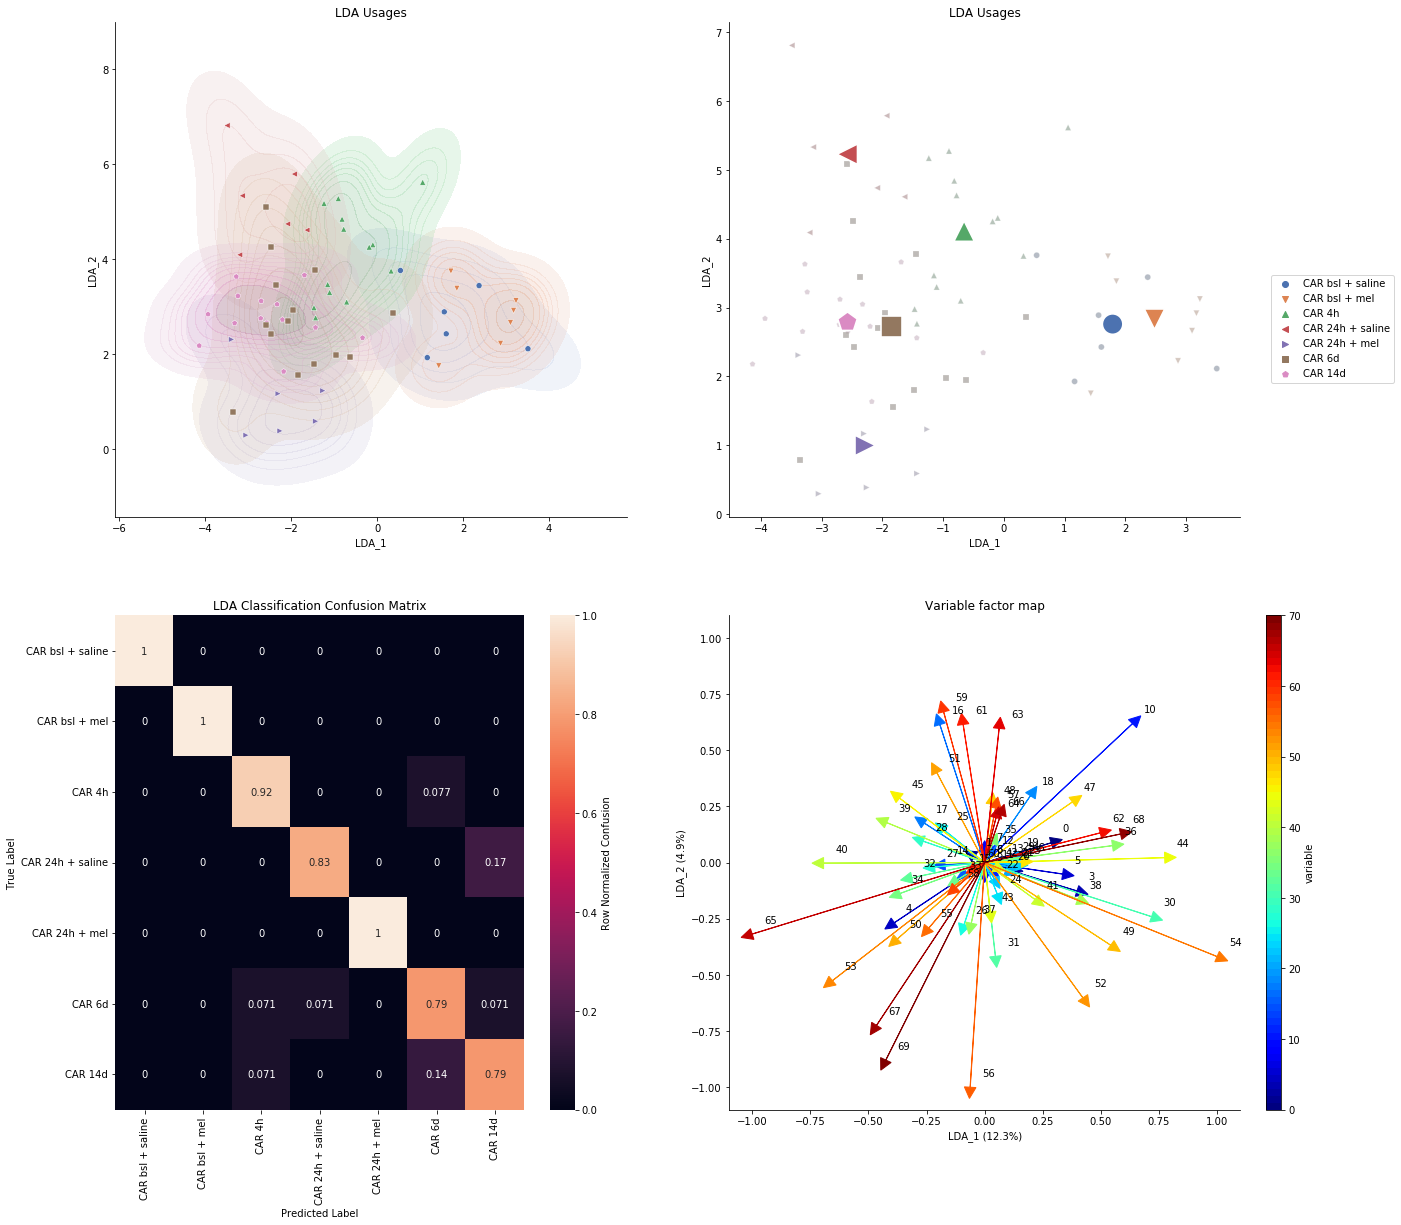

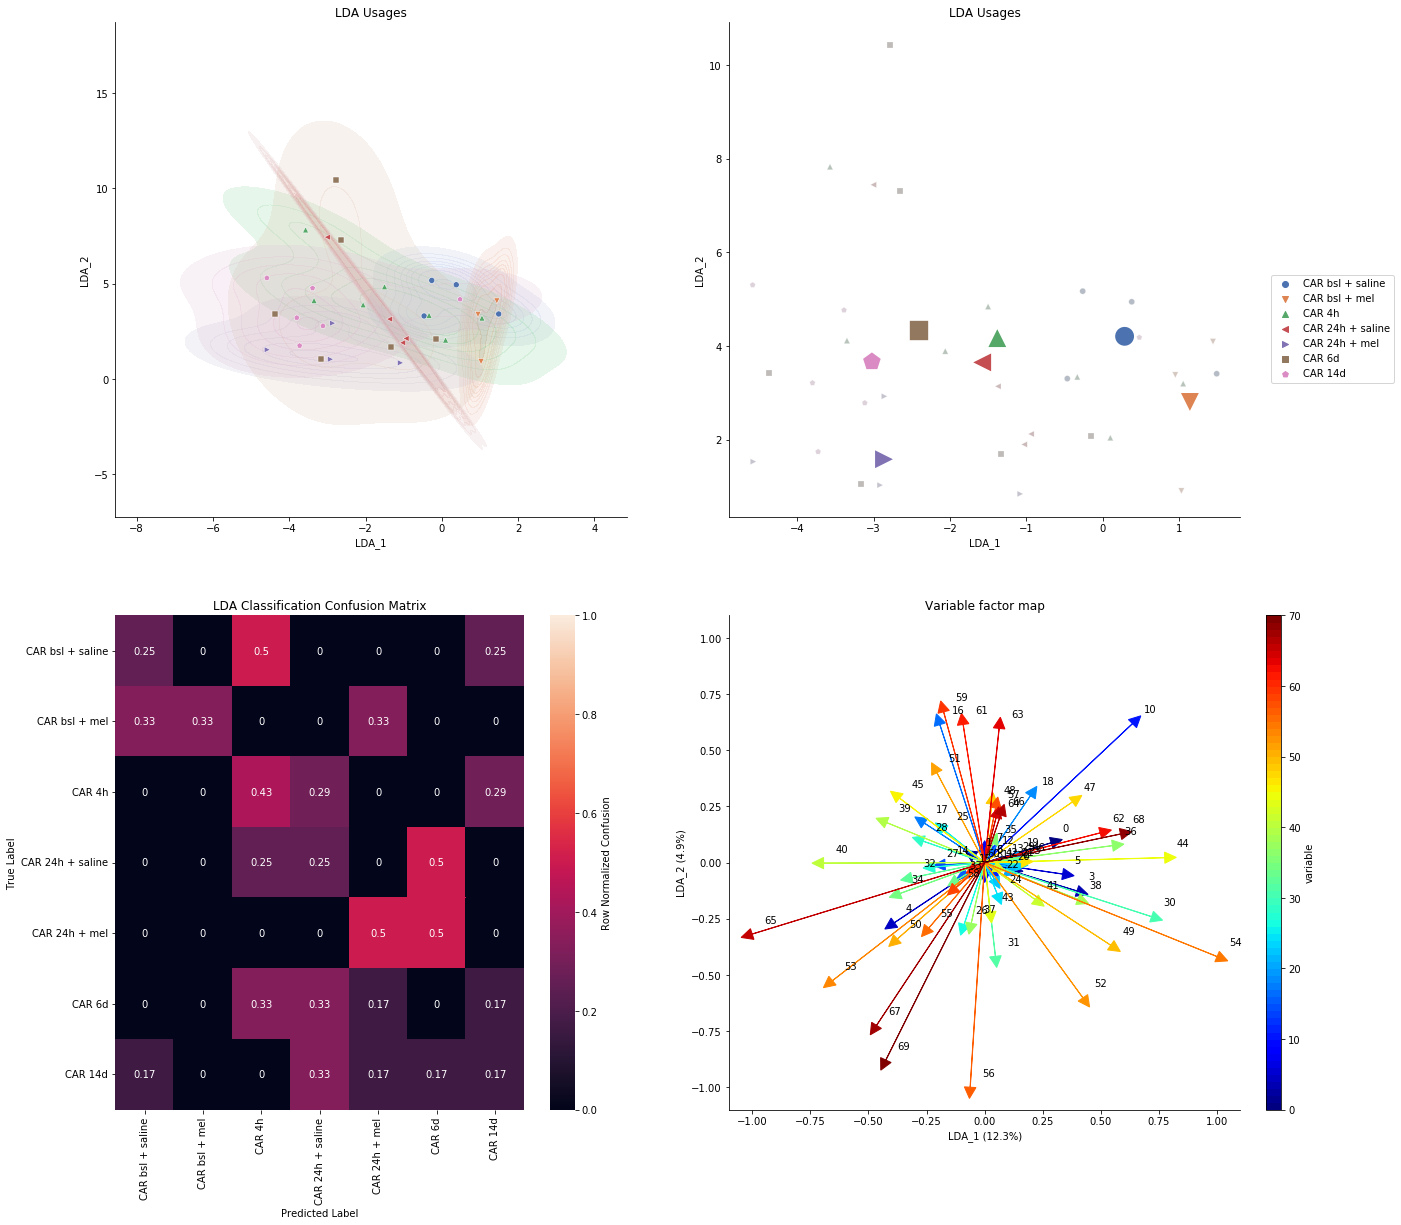

In [5]:
fig, axs, df = plot_lda_results(results.final, results.train, aes=aes, title='LDA Usages')
fig, axs, df = plot_lda_results(results.final, results.test, aes=aes, title='LDA Usages')

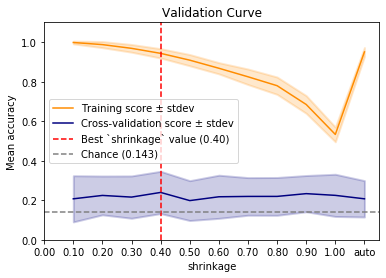

In [6]:
plot_validation_curve(results.cv_result)

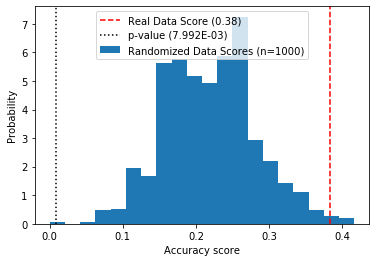

In [6]:
plot_permutation_score(results.final.estimator, results.data.usages, results.data.groups)

In [8]:
results.final.lda.scalings_.shape

(70, 70)

In [9]:
representations.groups

array(['CAR 4h', 'CAR bsl + mel', 'CAR bsl + mel', 'CAR bsl + saline',
       'CAR 14d', 'CAR 24h + mel', 'CAR 14d', 'CAR 6d',
       'CAR bsl + saline', 'CAR 24h + saline', 'CAR 4h', 'CAR 24h + mel',
       'CAR 6d', 'CAR 6d', 'CAR 6d', 'CAR 24h + saline', 'CAR 6d',
       'CAR bsl + saline', 'CAR bsl + mel', 'CAR 24h + saline', 'CAR 4h',
       'CAR 14d', 'CAR 4h', 'CAR 24h + mel', 'CAR 24h + mel', 'CAR 14d',
       'CAR 24h + mel', 'CAR 6d', 'CAR 4h', 'CAR bsl + mel', 'CAR 6d',
       'CAR 4h', 'CAR 24h + saline', 'CAR 14d', 'CAR 14d', 'CAR 14d',
       'CAR 4h', 'CAR bsl + saline', 'CAR 14d', 'CAR bsl + saline',
       'CAR 6d', 'CAR 14d', 'CAR bsl + saline', 'CAR 4h', 'CAR 6d',
       'CAR 24h + mel', 'CAR 4h', 'CAR 24h + saline', 'CAR 14d', 'CAR 6d',
       'CAR 14d', 'CAR bsl + saline', 'CAR bsl + mel', 'CAR 24h + saline',
       'CAR 4h', 'CAR bsl + mel', 'CAR bsl + mel', 'CAR 4h', 'CAR 14d',
       'CAR 4h', 'CAR 14d', 'CAR 4h', 'CAR 6d', 'CAR 14d',
       'CAR 24h + saline', 

In [7]:
results = train_lda_pipeline(representations, 'trans', lda_kwargs={'n_components': 2})
plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.final, representations, aes=aes, title='LDA Usages')

[91 53 28 90 49 20  5  2 12 94 25 17 52 56 83 74 29 45 18 62 31 99 43 47
 87 37  0 78 95 81 68  6 97 98 27 66 46 51 19 69 30 44 54 24 38 71  9 14
 77 96 16 61 22 73 48 89 92 21 67 58 60 59 39 34 75 41 64 57 42 35] [33 55 86 70 32 76 85  8 13 80 93 88 72 50  7  3 23 82 36  1 11 26 40 10
 63 65 79 84 15  4]
['CAR bsl + mel' 'CAR 24h + saline' 'CAR 4h' 'CAR 14d' 'CAR 6d' 'CAR 4h'
 'CAR 24h + mel' 'CAR bsl + mel' 'CAR 6d' 'CAR 24h + saline' 'CAR 14d'
 'CAR bsl + saline' 'CAR bsl + mel' 'CAR bsl + mel' 'CAR 24h + mel'
 'CAR 24h + mel' 'CAR bsl + mel' 'CAR 24h + mel' 'CAR bsl + mel' 'CAR 6d'
 'CAR 4h' 'CAR bsl + mel' 'CAR 4h' 'CAR 24h + saline' 'CAR 24h + mel'
 'CAR bsl + saline' 'CAR 4h' 'CAR 4h' 'CAR 14d' 'CAR 6d' 'CAR 6d'
 'CAR 14d' 'CAR 14d' 'CAR 4h' 'CAR 6d' 'CAR 14d' 'CAR 4h'
 'CAR bsl + saline' 'CAR 24h + saline' 'CAR 6d' 'CAR 6d' 'CAR 6d' 'CAR 4h'
 'CAR 24h + mel' 'CAR 14d' 'CAR bsl + saline' 'CAR 24h + saline' 'CAR 6d'
 'CAR 4h' 'CAR 24h + saline' 'CAR 6d' 'CAR 4h' 'CAR 4h' 'CAR 6d'

KeyboardInterrupt: 